# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Linguagem de Programação Python**

**prof: Sérgio Assunção Monteiro, DSc**

**Aula 05**

#**Regressão Linear**

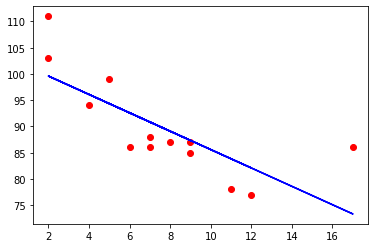

f(9)=87.34437086092716


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

def gerar_dados_l01():
  x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
  y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
  return x, y

def f_regressao_linear(x, y):  #f(x) = coef_angular * x + coef_linear
  coef_angular, coef_linear, r, p, std_err = stats.linregress(x, y)
  return coef_angular, coef_linear

def funcao_linear(x, coeficiente_angular, coeficiente_linear): 
  f = coeficiente_angular * x + coeficiente_linear
  return f

x, y = gerar_dados_l01()

coef_angular, coef_linear = f_regressao_linear(x, y)

regressao_linear = []
for w in x:
  f = funcao_linear(w, coef_angular, coef_linear)
  regressao_linear.append(f)

plt.scatter(x, y, color = 'red')
plt.plot(x, regressao_linear, color = 'blue')
plt.show()
#print(regressao_linear)

f = funcao_linear(9, coef_angular, coef_linear)
print('f(9)={}'.format(f))

#**Regressão Polinomial**

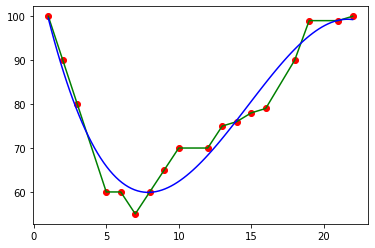

Erro de aproximação: 0.9432150416451026


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def gerar_dados_p01():
  x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22] #data
  y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
  return x, y

def f_regressao_polinomial(x, y):
  modelo = np.poly1d(np.polyfit(x, y, 3))
  return modelo

x, y = gerar_dados_p01()

modelo = f_regressao_polinomial(x, y)

linha = np.linspace(1, 22, 100)

plt.scatter(x, y, color='red')
plt.plot(x, y, color='green')
plt.plot(linha, modelo(linha), color='blue')
plt.show()
erro=r2_score(y, modelo(x))
print('Erro de aproximação: {}'.format(erro))

In [ ]:
print(modelo(22))
print(modelo(23))
print(modelo(24))
print(modelo(25))

99.24127229005046
98.09548850249544
95.4520871661491
91.12914300383954


#**Árvore de Decisão**

**exemplo 01**

In [ ]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

# Dados
X = [ [180, 15, 0],     
      [177, 42, 0],
      [136, 35, 1],
      [174, 65, 0],
      [141, 28, 1]]

Y = ['homem', 
     'mulher', 
     'mulher', 
     'homem', 
     'mulher']    

nomes_das_caracteristicas = ['altura', 
                             'comprimento do cabelo', 
                             'tom de voz' ]

In [ ]:
# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

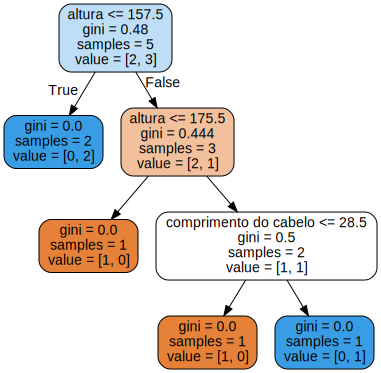

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=nomes_das_caracteristicas,
                                out_file=None,
                                filled=True,
                                rounded=True)

grafico = graphviz.Source(dot_data)  
grafico

In [ ]:
#Teste da árvore
X_test = [[180, 15, 0]]
y_pred = clf.predict(X_test)
y_pred

array(['homem'], dtype='<U6')

In [ ]:
#Teste da árvore
X_test = [[180, 30, 1]]
y_pred = clf.predict(X_test)
y_pred

array(['mulher'], dtype='<U6')